![AIcrowd-Logo](https://raw.githubusercontent.com/AIcrowd/AIcrowd/master/app/assets/images/misc/aicrowd-horizontal.png)


# Getting Started Code for [Chess Points](https://www.aicrowd.com/challenges/ai-blitz-6/problems/chess-points) on AIcrowd
#### Author : Shubhamai

## Download Necessary Packages 📚

In this baseline we are going to use FastAI as our main library to train out model and making & submitting predictions

In [1]:
!pip install --upgrade fastai git+https://gitlab.aicrowd.com/yoogottamk/aicrowd-cli.git >/dev/null
%load_ext aicrowd.magic

  Running command git clone -q https://gitlab.aicrowd.com/yoogottamk/aicrowd-cli.git /tmp/pip-req-build-1mycm532


## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [2]:
API_KEY = 'ce7f0ede343221512d7ff8600d55872e' #Please enter your API Key [https://www.aicrowd.com/participants/me]
%aicrowd login --api-key $API_KEY

Verifying API Key...
API Key valid
Saved API Key successfully!


In [3]:
%aicrowd dataset download --challenge chess-points -j 3

In [4]:
!rm -rf data
!mkdir data

!unzip train.zip  -d data/ 
!unzip val.zip -d data/ 
!unzip test.zip  -d data/ 

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: data/test/5499.jpg      
  inflating: data/test/55.jpg        
  inflating: data/test/550.jpg       
  inflating: data/test/5500.jpg      
  inflating: data/test/5501.jpg      
  inflating: data/test/5502.jpg      
  inflating: data/test/5503.jpg      
  inflating: data/test/5504.jpg      
  inflating: data/test/5505.jpg      
  inflating: data/test/5506.jpg      
  inflating: data/test/5507.jpg      
  inflating: data/test/5508.jpg      
  inflating: data/test/5509.jpg      
  inflating: data/test/551.jpg       
  inflating: data/test/5510.jpg      
  inflating: data/test/5511.jpg      
  inflating: data/test/5512.jpg      
  inflating: data/test/5513.jpg      
  inflating: data/test/5514.jpg      
  inflating: data/test/5515.jpg      
  inflating: data/test/5516.jpg      
  inflating: data/test/5517.jpg      
  inflating: data/test/5518.jpg      
  inflating: data/test/5519.jpg      
  inflating: data/test/552.jpg       


## Import packages

In [5]:
import pandas as pd
from fastai.vision.all import *
import os

## Load Data
- We use pandas 🐼 library to load our data.   
- Pandas loads the data into dataframes and facilitates us to analyse the data.   
- Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm) 🤓

In [6]:
train_df = pd.read_csv("data/train.csv")

## Visualize the data 👀

In [7]:
train_df

,ImageID,label
0,0,black
1,1,white
2,2,white
3,3,white
4,4,white
...,...,...
39995,39995,black
39996,39996,white
39997,39997,white
39998,39998,black


In [8]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

,ImageID,label
0,0.jpg,black
1,1.jpg,white
2,2.jpg,white
3,3.jpg,white
4,4.jpg,white
...,...,...
39995,39995.jpg,black
39996,39996.jpg,white
39997,39997.jpg,white
39998,39998.jpg,black


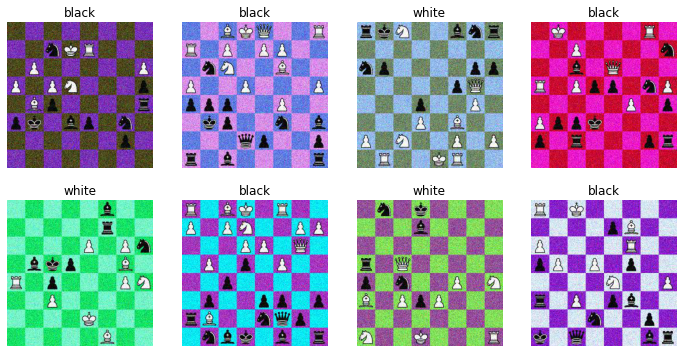

In [9]:
dls = ImageDataLoaders.from_df(train_df, path="data/train", bs=8)
dls.show_batch()

# TRAINING PHASE 🏋️

In [10]:
learn = cnn_learner(dls, resnet101, metrics=F1Score())

## Train the Model

In [11]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,f1_score,time
0,0.537961,0.446103,0.793193,12:16


epoch,train_loss,valid_loss,f1_score,time
0,0.326461,0.224254,0.917844,16:55
1,0.313866,0.208337,0.920311,16:57
2,0.291715,0.185453,0.932169,16:59
3,0.284973,0.182961,0.926382,16:56
4,0.276805,0.147368,0.967945,16:53
5,0.297196,0.162984,0.950747,16:52
6,0.278899,0.158783,0.945033,16:49
7,0.278384,0.139249,0.970822,16:53


╭───────────────────── Traceback (most recent call last) ──────────────────────╮
│ /usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882 │
│ in run_code                                                                  │
│                                                                              │
│   2879 │   │   │   try:                                                      │
│   2880 │   │   │   │   self.hooks.pre_run_code_hook()                        │
│   2881 │   │   │   │   #rprint('Running code', repr(code_obj)) # dbg         │
│ ❱ 2882 │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)     │
│   2883 │   │   │   finally:                                                  │
│   2884 │   │   │   │   # Reset our crash handler in place                    │
│   2885 │   │   │   │   sys.excepthook = old_excepthook                       │
│ <ipython-input-11-5f9e2c85affb>:1 in <module>                                │
│                           

# Testing Phase 😅

We are almost done. We trained and validated on the training data. Now its the time to predict on test set and make a submission.# Prediction on Evaluation Set

## Predict Test Set
Predict on the test set and you are all set to make the submission!

In [12]:
test_imgs_name = get_image_files("data/test")
test_dls = dls.test_dl(test_imgs_name)

label_to_class_mapping = {v: k for v, k in enumerate(dls.vocab)}
print(label_to_class_mapping)

test_img_ids = [re.sub(r"\D", "", str(img_name)) for img_name in test_imgs_name]

{0: 'black', 1: 'white'}


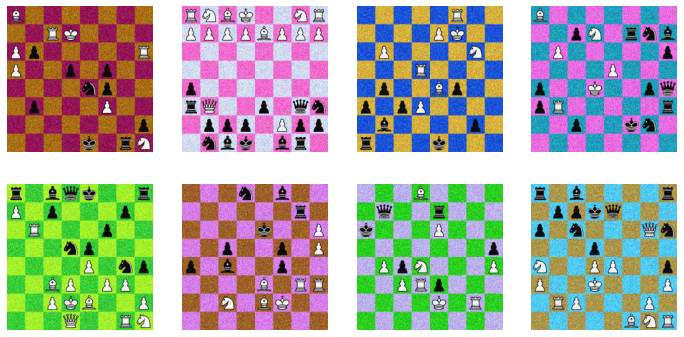

In [13]:
test_dls.show_batch()

In [14]:
_,_,results = learn.get_preds(dl = test_dls, with_decoded = True)

results = [label_to_class_mapping[i] for i in results.numpy()]

epoch,train_loss,valid_loss,f1_score,time
0,0.326461,0.224254,0.917844,16:55
1,0.313866,0.208337,0.920311,16:57
2,0.291715,0.185453,0.932169,16:59
3,0.284973,0.182961,0.926382,16:56
4,0.276805,0.147368,0.967945,16:53
5,0.297196,0.162984,0.950747,16:52
6,0.278899,0.158783,0.945033,16:49
7,0.278384,0.139249,0.970822,16:53


## Save the prediction to csv

In [15]:
submission = pd.DataFrame({"ImageID":test_img_ids, "label":results})
submission

,ImageID,label
0,7255,white
1,7113,white
2,8581,white
3,1383,black
4,2914,white
...,...,...
9995,6300,black
9996,9115,black
9997,4331,white
9998,4094,white


In [17]:
submission.to_csv("submission.csv", index=False)

### 🚧 Note :    
- Do take a look at the submission format.   
- The submission file should contain a header.   
- Follow all submission guidelines strictly to avoid inconvenience.

## To download the generated csv in colab run the below command

In [ ]:
submission.shape

In [ ]:
try:
    from google.colab import files
    files.download('submission_chesspoints.csv') 
except:
    print("Option Only avilable in Google Colab")

### Well Done! 👍 We are all set to make a submission and see your name on leaderborad. Let navigate to [challenge page](https://www.aicrowd.com/challenges/higherpoint) and make one.